# ITMAL Exercise

REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0208| CEF, minor text update.
2018-0305| CEF, updated with SHN comments.
2019-0902| CEF, updated for ITMAL v2.
2019-0904| CEF, updated and added conclusion Q.

## Implementing a dummy classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qb  Load and display the MNIST data

There is a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. You can load MNIST data like 

```python
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',??) # needs to return X, y, replace '??' with suitable parameters! 
# Convert at scale (not always needed)
#X = X / 255.
```

but you need to set parameters like `return_X_y` and `cache` if the default values are not suitable! 

Check out the documentation for the `fetch_openml` MNIST loader, try it out by loading a (X,y) MNIST data set, and plot a single digit via the `MNIST_PlotDigit` function here (input data is a 28x28 NMIST subimage)

```python
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
```

Finally, put the MNIST loader into a single function called `MNIST_GetDataSet()` so you can resuse it later.

### Qa Answers

When using the MNIST dataset we must use the function fetch_openml. We use the parameter return_X_y to get X matrix and y vector returned separately. X is a 70000 x 784  matrix  where the 784 define the images 28 x 28 pixel values.

### Qa Answers

When using the MNIST dataset we must use the function fetch_openml. We use the parameter return_X_y to get X matrix and y vector returned separately. X is a 70000 x 784  matrix  where the 784 define the images 28 x 28 pixel values.

In [7]:
# TODO: add your code here..
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', cache=True, return_X_y=True) # needs to return X, y, replace '??' with suitable parameters! 
# Convert at scale (not always needed)
#X = X / 255.

# define MNIST_GetDataSet function:
def MNIST_GetDataSet():
    return fetch_openml('mnist_784',cache=True, return_X_y=True)

In [8]:
#define MNIST_PlotDigit function:
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

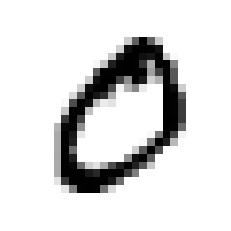

In [9]:
#Plot a single digit:
MNIST_PlotDigit(X[1])

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOLM], p82.

Split your data and run the fit-predict for the classifier using the MNIST data.(We will be looking at cross-validation instead of the simple fit-predict in a later exercise.)

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')
```
instead of the `y`'s you are getting out of the dataloader...

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

### Qb Answers

The code below follows the approach of running a SGD Classifier from [HOLM].

Firstly, the data is split in a traning and test set in order to test and evaluate the algorithm on data it has not been trained on, this is very important.

The y vector is then redefined in terms of whether the true result of all the images is '5'. This so that the problem can be approach as binary classication.

After all the setup a the scikit learn fit-predict interface is used on the SGDClassifier; a  object of this class is instantiated. Then this object's fit method is called passing in the test set both X_train and y_train_5 (the training data and the corresponding true values), traing the classifier. The last step is to test the classifier on "new" (test) data.

In [10]:
#split data into training and test data (already loaded):
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [11]:
#Compare y vector to '5'
y_train_5 = (y_train == '5')
y_test_5  = (y_test == '5')

In [12]:
#create SDGClassifier object
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [13]:
#fit training data
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

array([ True])

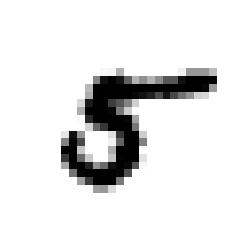

In [14]:
#predict using test data
MNIST_PlotDigit(X_test[-2])
sgd_clf.predict([X_test[-2]])

### Qb Answers continued

Below the are some score metrics applied to the SGDClassifier to evalute it's predictions. From the cross validation function the accuracy of the classifier is shown to be above 95 percent. But the accuracy alone can be misleading as a measure of the quality of our algorithm, specially when the data is skewed as it is in this dataset. The number of images in the classified as a '5' is far smaller than those classified as "not '5'". A high accuracy could be achieved by just "guessing" that the images does not contain a '5'. This is seen in the next exercise implementing the "Dummy Classifier". A such algorithm can't really be used to make meaningful prediction despite it having a high accuracy score.

Therefore the confusion mattix for the SGDClassifier is also calculated. This shows that it predicted 52316 "True Negatives", 601 "False Negatives", 2263 "False Positives" and 4820 "True Positives".

In [15]:
#use cross-validation to score the classifier:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#### Qc Implement a dummy binary classifier

Now we will try to create a Scikit-learn compatible estimator implemented via a python class. Follow the code found in [HOML], p84, but name you estimator `DummyClassifier` instead of `Never5Classifyer`.

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="https://itundervisning.ase.au.dk/E19_itmal/L02/Figs/class_base_estimator.png" style="width:500px">

All Scikit-learn classifiers inherit from `BaseEstimator` (and possibly also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duck typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and find a way to extract the accuracy `score` from the test data. You may implement an accuracy function yourself or just use the `sklearn.metrics.accuracy_score` function. 

Finally, compare the accuracy score from your `DummyClassifier` with the scores found in [HOML] "Measuring Accuracy Using Cross-Validation", p.83. Are they comparable? 

### Qc Anwsers

Below is the DummyClassifier defined, returning a vector only containing False for a number of entries equal to the length of X, the number of images.

Similarly to the SGDClassifier the DummyClassisier has been scored using the same functions. Even though the DummyClassifier has an accuracy of 90 percent, it performs no "intelligent" operations or predictions. This is due to the skewed dataset as mentioned earlier

The confusion matrix of the DummyClassifier consists of: 54579 TN, 5421 FN, 0 TP and 0 FP. Compared to that of the SGDClassifier, the DummyClassifier correctly performs better when naming "true negative" results and there are no "false positives". But it has a higher number of "false negatives" and none "true positives". This of course fits with the definition of class.
Even though the accuracy of the two classes are close, the DummyClassifier performs worse overall, as it can not give any meaningful predictions.

In [18]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [19]:
dmmy_clf = DummyClassifier()
cross_val_score(dmmy_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [20]:
y_train_pred = cross_val_predict(dmmy_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5,y_train_pred)

array([[54579,     0],
       [ 5421,     0]], dtype=int64)

### Qd Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

### Qd Answers

This exercise has been an great introduction to a second application of ML, classification. It has also been benifitial as an introdction to the using the scikit fit-predict interface, and the process that needs to be followed when working on a problem using ML, overall. These are:
- Aquiring a dataset (and labelling the set), which has been done for us
- Splitting the data into into a training and test set, as not to score the algorithm using the set it has been fitted on.
- Performing the fit using the trainging data and correct labels.
- Testing and scoring the the algorithm ona new set. 

The exercise has also shown the downside of relying to much on the accuracy score on its own, and that you have to consider the specifics and shape of your dataset when performing this score.